In [1]:
import numpy as np
from PIL import Image
import cv2  

In [2]:
def mesaji_bite_cevir(mesaj):
    return ''.join([format(ord(harf), '08b') for harf in mesaj])


def bitleri_mesaja_cevir(bit_dizisi):
    karakterler = [bit_dizisi[i:i+8] for i in range(0, len(bit_dizisi), 8)]
    return ''.join([chr(int(karakter, 2)) for karakter in karakterler])

def gorsel_olustur(dosya_adi="ornek_gorsel.jpg"):
    gorsel = np.full((256, 256), 128, dtype=np.uint8)  # gri ton
    im = Image.fromarray(gorsel)
    im.save(dosya_adi)
    print("Görsel oluşturuldu:", dosya_adi)

# mesajı dct ile görsele gömme;
def mesaj_gizle_dct(gorsel_yolu, mesaj, cikti_gorsel):
    img = cv2.imread(gorsel_yolu, cv2.IMREAD_GRAYSCALE)
    img = np.float32(img)
    blok_boyutu = 8
    satirlar, sutunlar = img.shape

    mesaj += "####"  # bitiş
    mesaj_bitleri = mesaji_bite_cevir(mesaj)
    bit_index = 0

    for i in range(0, satirlar, blok_boyutu):
        for j in range(0, sutunlar, blok_boyutu):
            if bit_index >= len(mesaj_bitleri):
                break

            blok = img[i:i+blok_boyutu, j:j+blok_boyutu]
            dct = cv2.dct(blok)

            # dct nin [4][4] pozisyonunu kullanıyoruz 
            bit = int(mesaj_bitleri[bit_index])
            katsayi = dct[4][4]

            if katsayi >= 0:
                dct[4][4] = katsayi - (int(katsayi) % 2) + bit
            else:
                dct[4][4] = katsayi + (int(-katsayi) % 2) - bit

            img[i:i+blok_boyutu, j:j+blok_boyutu] = cv2.idct(dct)
            bit_index += 1

        if bit_index >= len(mesaj_bitleri):
            break

    # yeni görseli uint8'e çevir ve kaydet
    img = np.clip(img, 0, 255)
    yeni_gorsel = np.uint8(img)
    cv2.imwrite(cikti_gorsel, yeni_gorsel)
    print("📂 Mesaj başarıyla gömüldü:", cikti_gorsel)

# mesajı görselden çözme
def mesaj_coz_dct(gorsel_yolu):
    img = cv2.imread(gorsel_yolu, cv2.IMREAD_GRAYSCALE)
    img = np.float32(img)
    blok_boyutu = 8
    satirlar, sutunlar = img.shape
    bitler = ""

    for i in range(0, satirlar, blok_boyutu):
        for j in range(0, sutunlar, blok_boyutu):
            blok = img[i:i+blok_boyutu, j:j+blok_boyutu]
            dct = cv2.dct(blok)
            katsayi = int(dct[4][4])
            bitler += str(katsayi % 2)

            if len(bitler) % 8 == 0:
                mesaj = bitleri_mesaja_cevir(bitler)
                if "####" in mesaj:
                    print("📥 Çözülen Mesaj:")
                    print(mesaj.split("####")[0])
                    return

    print(" Mesaj bulunamadı.")

# çalıştırma;
gorsel_olustur()
mesaj = "Bu görselin içine DCT yöntemiyle gizlenmiş gizli bir mesaj bulunmaktadır."
mesaj_gizle_dct("ornek_gorsel.jpg", mesaj, "gizli_dct.jpg")
mesaj_coz_dct("gizli_dct.jpg")


Görsel oluşturuldu: ornek_gorsel.jpg
📂 Mesaj başarıyla gömüldü: gizli_dct.jpg
 Mesaj bulunamadı.


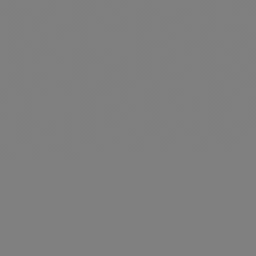

In [3]:
from IPython.display import Image as Gorsel
Gorsel("gizli_dct.jpg")